In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import random
from collections import Counter, defaultdict
from scipy import integrate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import tqdm
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score
import scipy
from sklearn.linear_model import LinearRegression
import time
import sys
import os

sys.path.append(os.path.dirname(os.getcwd())) #define path to the project for convenoent relative import

from simulation.SEIR_model import SEIRModel
from simulation.model_output import SEIRModelOutput
from simulation.error_model import NaiveErrorModel

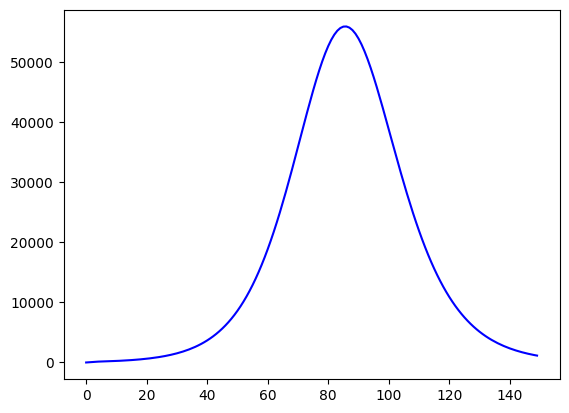

In [23]:
model = SEIRModel(population=5*1e6)
R_0 = 2

t_incubation = 2 # in days
t_infective = 4 # in days

alpha = 1/t_incubation
gamma = 1/t_infective
beta = gamma*R_0
init_inf_frac = 0.0001
init_rec_frac = 0.2
tmax = 150 # days

res = model.simulate(alpha=alpha, beta=beta, gamma=gamma, init_inf_frac=init_inf_frac, init_rec_frac=init_rec_frac)

plt.plot(res.daily_incidence, color='blue', alpha=1)

C:\Users\user\AppData\Local\Temp\ipykernel_14004\821084847.py:16: RuntimeWarning: Mean of empty slice
  mean_curve = np.nanmean(noise_data_arr, axis=0)


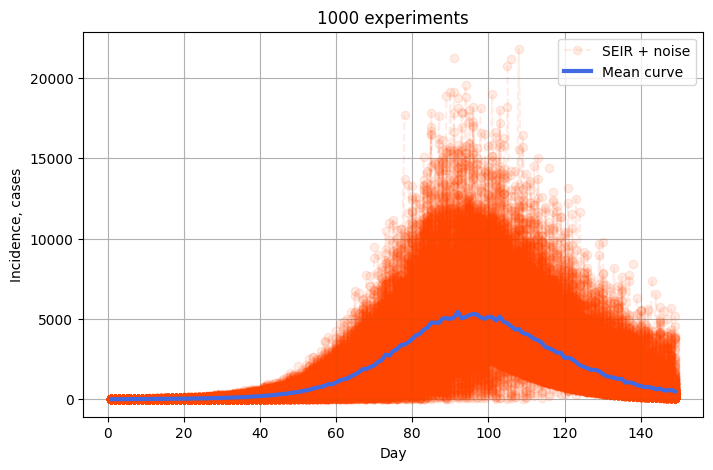

In [24]:
num_exp = 1000
noise_data_arr = []
for index in range(num_exp):
    error_model = NaiveErrorModel(res.daily_incidence, mean_delay=1/11.8, mean_underreporting=0.06)
    error_model.add_noise()
    noise_data_arr.append(error_model.incidence_arr)


fig, ax = plt.subplots(figsize=(8, 5))
# initial data
# ax.plot(res.daily_incidence, color='RoyalBlue', lw=3, label='SEIR')
ax.plot(noise_data_arr[0], '--o', color='OrangeRed', label='SEIR + noise', alpha=0.1)
for index in range(num_exp):
    ax.plot(noise_data_arr[index], '--o', color='OrangeRed', alpha=0.1)

mean_curve = np.nanmean(noise_data_arr, axis=0)
ax.plot(mean_curve, lw=3, color='RoyalBlue', label='Mean curve')
ax.set_xlabel('Day')
ax.set_ylabel('Incidence, cases')
ax.legend()
ax.set_title(r'{} experiments'.format(num_exp))
ax.grid()
# fig.savefig('./figures/report_rscf_seir_only_noise.pdf', bbox_inches='tight')
# fig.savefig('./figures/report_rscf_seir_only_noise.png', dpi=600, 
#             bbox_inches='tight')

- Гипотеза, что хорошие данные подчиняются модели из статьи
- Данные, не покрывающиеся такой моделью -- "красная зона"
- Нужно понять, насколько реальные данные отклоняются от модели ошибок
- Восстанавливание исходных эпидкривых (синтетика)
- 
- Восстанавливание исходных эпидкривых (по реальным данным) данные -> I, a, b, p
- 4 вида ошибок: ошибка в данных исходя их стохастичности эпид процесса, 
- позажимать часть ошибок и посмотреть влияние наличия ошибок на способность восстанавливать данные
- 


$C_t^i$

##### Data restoration: known and defined parameters
$$ m = \frac{a+b}{2}$$
$$I_t = \frac{\mathbb{E}C_t - \frac{m}{p}}{p}$$

In [ ]:
m = 0.07
p = 1/11.8
restored_data = (mean_curve - m/p)/p

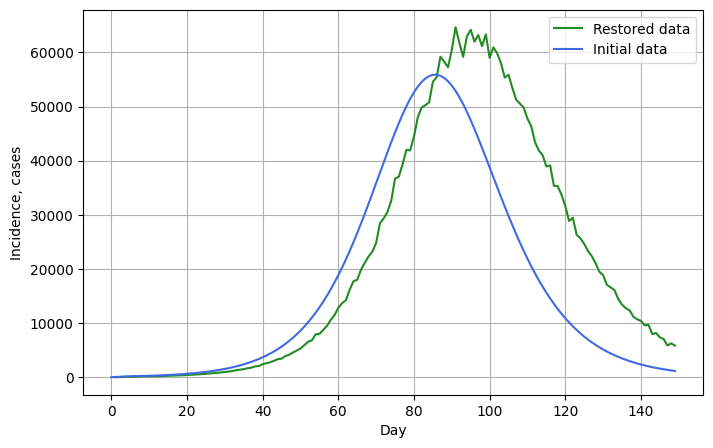

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(restored_data, color='ForestGreen', label='Restored data')
ax.plot(res.daily_incidence, color='RoyalBlue', label='Initial data')

ax.set_xlabel('Day')
ax.set_ylabel('Incidence, cases')
ax.legend()
ax.grid()
fig.savefig('restored_data.pdf', bbox_inches='tight')
fig.savefig('restored_data.png', bbox_inches='tight')